# Phase 4: Predictive Modeling



**Objective**: Build models to predict the success of an app.

**Tasks**:
1.  **Regression**: Predict the number of `Installs`.
2.  **Classification**: Predict if an app will be `High Rated` (Rating > 4.0).

**Models**:
- **KNN (K-Nearest Neighbors)**: Simple, instance-based learning.
- **Random Forest**: Ensemble method, robust and accurate.
We initially used **KNN (K-Nearest Neighbors)** for prediction because it is simple,
easy to interpret, and is part of our coursework. However, KNN had limitations on
our dataset:

- Our dataset is large (~3.3M records), and KNN becomes slower and less accurate
  with large datasets.
- KNN is heavily affected by feature scaling and noise.
- KNN assumes that similar points are near each other, which does not always
  hold true in real-world datasets with non-linear patterns.

Because of these limitations, the accuracy and RMSE results from KNN were not
satisfactory. To overcome this, we introduced **Random Forest**, which is a
more robust algorithm that:

- Handles large datasets efficiently,
- Works well with both numerical and categorical features,
- Reduces overfitting by combining multiple decision trees,
- Automatically identifies which features are most important for prediction.

This allowed us to compare:
➡ A basic syllabus-level model (KNN)   
vs  
➡ A real-world industry-used model (Random Forest)

and conclude that Random Forest is more suitable for our problem.

**Steps**:
1.  **Feature Engineering**: Convert categories to numbers (Encoding).
2.  **Train/Test Split**: 80% for training, 20% for testing.
3.  **Model Training**: Fit the models.
4.  **Evaluation**: Calculate Accuracy, RMSE, Confusion Matrix.
    


## 1. Import Libraries & Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import os

def get_data_path(filename):
    possible_paths = [
        f"../output/{filename}",
        f"output/{filename}",
        f"/Users/jatinbisen/Desktop/Data_mining/output/{filename}"
    ]
    for path in possible_paths:
        if os.path.exists(path):
            return path
    return None

# Load cleaned data
google_df = pd.read_csv(get_data_path('google_cleaned.csv'))
print("Data loaded.")


Data loaded.


## 2. Feature Engineering



We need to convert text data (`Category`, `Content_Rating`) into numbers.
We will use **Label Encoding**.
    


In [9]:
# Select features and target
# We want to predict 'Installs'
features = ['Category', 'Rating', 'Reviews', 'Size', 'Price', 'Content_Rating']
target = 'Installs'

data_model = google_df[features + [target]].dropna().copy()

# Encode Categorical Variables
le_cat = LabelEncoder()
data_model['Category'] = le_cat.fit_transform(data_model['Category'])

le_cont = LabelEncoder()
data_model['Content_Rating'] = le_cont.fit_transform(data_model['Content_Rating'])

print("Data encoded.")
data_model.head()


Data encoded.


,Category,Rating,Reviews,Size,Price,Content_Rating,Installs
0,1,0.0,0.0,10485760.0,0.0,1,10.0
1,42,4.4,64.0,3040870.4,0.0,1,5000.0
2,33,0.0,0.0,3879731.2,0.0,1,50.0
3,13,5.0,5.0,1887436.8,0.0,1,10.0
4,42,0.0,0.0,6501171.2,0.0,1,100.0


## 3. Regression: Predicting Installs



We will try to predict the exact number of installs.
Since 'Installs' varies hugely, we might predict the **Log(Installs)** for better performance, but let's try raw first.
    


In [3]:
X = data_model[features]
y = data_model[target]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data (Important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and scaled.")


Data split and scaled.


### 3.1 Random Forest Regressor


In [4]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 8145496.750517195


### 3.2 KNN Regressor


In [5]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"KNN RMSE: {rmse_knn}")


KNN RMSE: 11797696.359825306


## 4. Classification: Predicting High Rating



Let's turn this into a classification problem.
**Target**: `Is_High_Rated` (1 if Rating > 4.0, else 0).
    


In [6]:
# Create binary target
data_model['Is_High_Rated'] = (data_model['Rating'] > 4.0).astype(int)

X_class = data_model[['Category', 'Reviews', 'Size', 'Price', 'Installs', 'Content_Rating']]
y_class = data_model['Is_High_Rated']

# Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Scale
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)


### 4.1 Random Forest Classifier


In [7]:
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_c, y_train_c)
y_pred_rf_c = rf_class.predict(X_test_c)

print("Random Forest Accuracy:", accuracy_score(y_test_c, y_pred_rf_c))
print(classification_report(y_test_c, y_pred_rf_c))


Random Forest Accuracy: 0.8031256159063243
              precision    recall  f1-score   support

           0       0.86      0.84      0.85    290906
           1       0.69      0.72      0.70    140369

    accuracy                           0.80    431275
   macro avg       0.78      0.78      0.78    431275
weighted avg       0.81      0.80      0.80    431275



### 4.2 Confusion Matrix


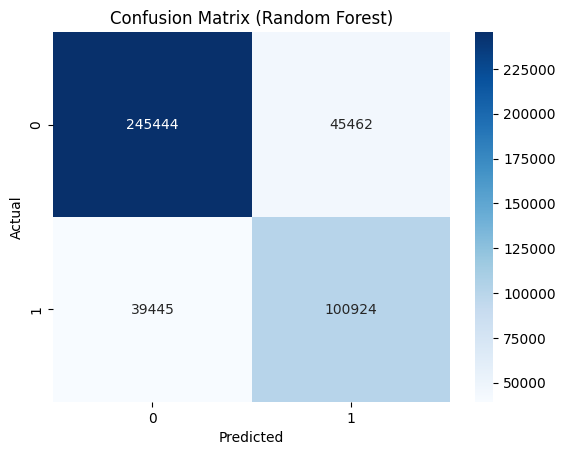

In [8]:
cm = confusion_matrix(y_test_c, y_pred_rf_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
